In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy.stats import pearsonr

In [6]:
import statsmodels

In [7]:
import math

In [8]:
import statsmodels.api as sm

In [9]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 20})

In [10]:
all_data = pd.read_csv('/Users/mickeytessema/Desktop/Data Analysis Portfolio/all_data.csv')

In [11]:
all_data.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)

In [12]:
all_data['Country'].replace(['United States of America'], ['USA'], inplace=True)

In [13]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
 4   Developed        96 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 3.9+ KB
None


In [14]:
print(all_data.describe())

              Year  Life Expectancy           GDP
count    96.000000        96.000000  9.600000e+01
mean   2007.500000        72.789583  3.881067e+12
std       4.633971        10.672882  5.198321e+12
min    2000.000000        44.300000  4.415703e+09
25%    2003.750000        74.475000  1.735000e+11
50%    2007.500000        76.750000  1.280000e+12
75%    2011.250000        78.900000  4.067500e+12
max    2015.000000        81.000000  1.810000e+13


In [15]:
print(all_data.head())

  Country  Year  Life Expectancy           GDP       Developed
0   Chile  2000             77.3  7.786093e+10  Underdeveloped
1   Chile  2001             77.3  7.097992e+10  Underdeveloped
2   Chile  2002             77.8  6.973681e+10  Underdeveloped
3   Chile  2003             77.9  7.564346e+10  Underdeveloped
4   Chile  2004             78.0  9.921039e+10  Underdeveloped


In [16]:
# What countries have the highest life expectancy? The lowest? What is the average?

In [17]:
life_expectancy_mean = round(np.mean(all_data['Life Expectancy']), 2)

In [18]:
country_life_expectancy_mean = round(all_data.groupby('Country')['Life Expectancy'].mean(), 2)

In [19]:
country_life_expectancy_mean_reset = country_life_expectancy_mean.reset_index().sort_values(by='Life Expectancy')

In [20]:
print(country_life_expectancy_mean_reset)

    Country  Life Expectancy
5  Zimbabwe            50.09
1     China            74.26
3    Mexico            75.72
4       USA            78.06
0     Chile            78.94
2   Germany            79.66


In [21]:
life_expectancy_std = round(all_data['Life Expectancy'].std(), 2)

In [22]:
x_values = country_life_expectancy_mean_reset['Country']

In [23]:
y_values = country_life_expectancy_mean_reset['Life Expectancy']

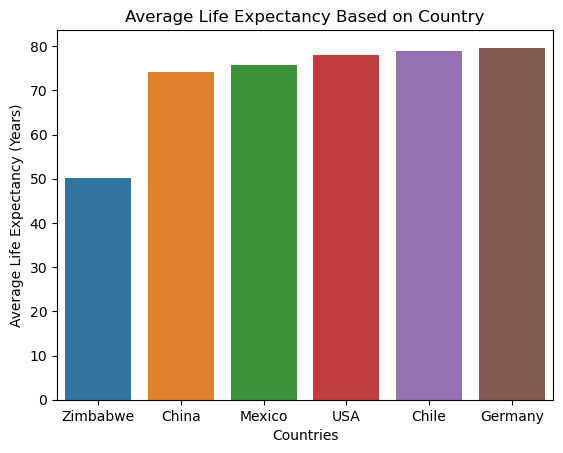

<Figure size 640x480 with 0 Axes>

In [24]:
sns.barplot(x = x_values, y = y_values)
plt.xlabel('Countries')
plt.ylabel('Average Life Expectancy (Years)')
plt.title('Average Life Expectancy Based on Country')
plt.show()
plt.clf()

In [25]:
print('The average life expectancy for sampled countries is ' + str(life_expectancy_mean) + ' years with a standard deviation of ' + str(life_expectancy_std) + ' The country with the lowest average life expectancy is Zimbabwe, with an life expectancy of 50.09 years. The country with the highest average life expectancy is Germany, with a life expectancy of 79.66 years.')  

The average life expectancy for sampled countries is 72.79 years with a standard deviation of 10.67 The country with the lowest average life expectancy is Zimbabwe, with an life expectancy of 50.09 years. The country with the highest average life expectancy is Germany, with a life expectancy of 79.66 years.


In [26]:
# What countries have the highest GDP? The lowest? What is the average?

In [27]:
gdp_mean = round(np.mean(all_data.GDP), 2)

In [28]:
gdp_country_mean = all_data.groupby('Country')['GDP'].mean().reset_index().sort_values(by = 'GDP')

In [29]:
print(gdp_country_mean)

    Country           GDP
5  Zimbabwe  9.062580e+09
0     Chile  1.698395e+11
3    Mexico  9.762500e+11
2   Germany  3.095000e+12
1     China  4.961250e+12
4       USA  1.407500e+13


In [30]:
quartiles = all_data['GDP'].quantile([0.25, 0.75])
iqr = round(quartiles[0.75] - quartiles[0.25], 2)

In [31]:
x_values = gdp_country_mean.Country

In [32]:
y_values = gdp_country_mean.GDP

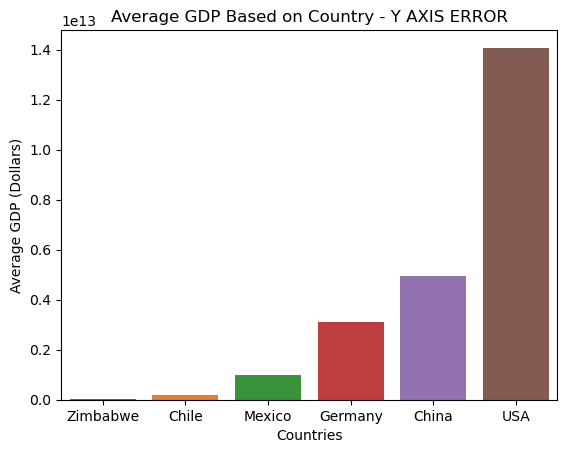

<Figure size 640x480 with 0 Axes>

In [33]:
sns.barplot(x = x_values, y = y_values)
plt.title('Average GDP Based on Country - Y AXIS ERROR')
plt.xlabel('Countries')
plt.ylabel('Average GDP (Dollars)')
plt.show()
plt.clf()

In [34]:
min_gdp = round(gdp_country_mean.min()[1], 2)

In [35]:
max_gdp = round(gdp_country_mean.max()[1], 2)

In [36]:
print('The average GDP for sampled countries is $' + str(gdp_mean) + ' with an IQR of $' + str(iqr) + '.The country with the lowest average GDP is Zimbabwe with a GDP of $9062580000. The country with the highest average GDP is the USA with a GDP of $14075000000000.') 

The average GDP for sampled countries is $3881067008268.4 with an IQR of $3894000000000.0.The country with the lowest average GDP is Zimbabwe with a GDP of $9062580000. The country with the highest average GDP is the USA with a GDP of $14075000000000.


In [37]:
#Is there a relationship between life expectancy and GDP? If so, what kind of relationship is it? How strong is this relationship?

In [38]:
scatter_x  = all_data['GDP']

In [39]:
scatter_y = all_data['Life Expectancy']

In [40]:
scatter_hue = all_data['Developed']

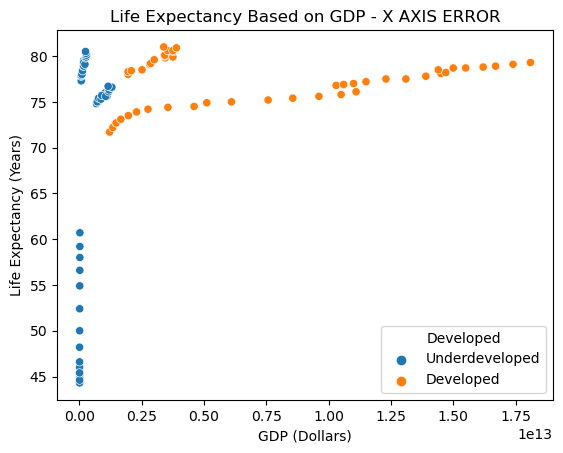

<Figure size 640x480 with 0 Axes>

In [41]:
sns.scatterplot(x = scatter_x, y = scatter_y, hue = scatter_hue)
plt.title('Life Expectancy Based on GDP - X AXIS ERROR')
plt.xlabel('GDP (Dollars)')
plt.ylabel('Life Expectancy (Years)')
plt.show()
plt.clf()

In [42]:
pearson_correlation_coefficient, p = pearsonr(all_data['Life Expectancy'], all_data['GDP'])

In [43]:
pearson_correlation_coefficient = round(pearson_correlation_coefficient, 2)

In [44]:
print('There is a moderately positive correlation with life expectancy and GDP, based off of the pearsons correlation co-efficient of ' + str(pearson_correlation_coefficient) + '.')

There is a moderately positive correlation with life expectancy and GDP, based off of the pearsons correlation co-efficient of 0.34.


In [45]:
#Is there a relationship between life expectancy and country? 

In [46]:
y_values_expectency = all_data['Life Expectancy'].sort_values()

Text(0.5, 1.0, 'Life Expectancy Based on Country')

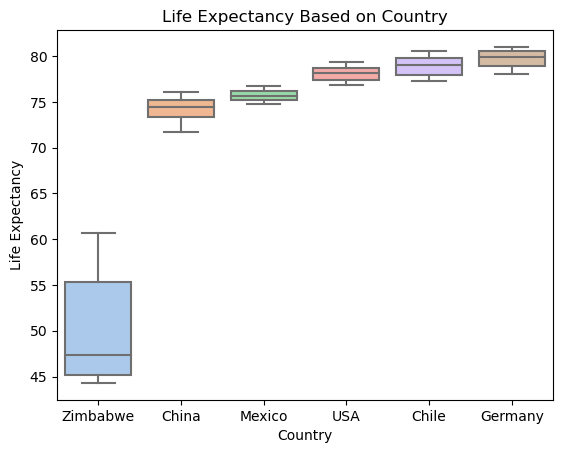

In [47]:
sns.boxplot(x = all_data['Country'], y = y_values_expectency, data = all_data, palette = 'pastel', order = ['Zimbabwe', 'China', 'Mexico', 'USA','Chile', 'Germany'])
plt.title('Life Expectancy Based on Country')

In [48]:
print('According to the box-plot, there does seem to be a relationship between Country and Life Expectancy.')

According to the box-plot, there does seem to be a relationship between Country and Life Expectancy.


In [49]:
#How does life expectancy differ between developed and underdeveloped countries?

In [50]:
devloped_expectancy_average = round(all_data.groupby('Developed')['Life Expectancy'].mean(), 2)

In [51]:
devloped_expectancy_average = devloped_expectancy_average.reset_index()

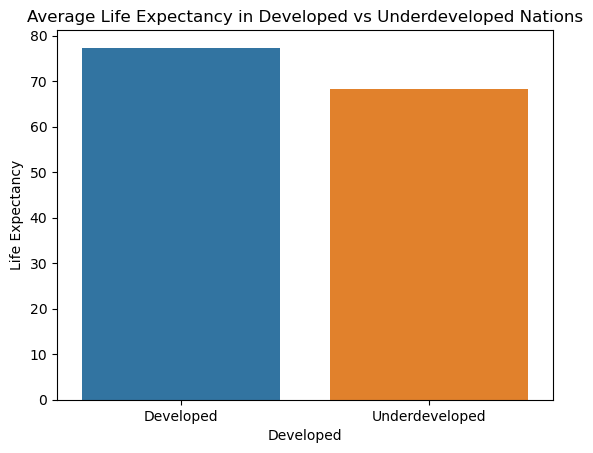

<Figure size 640x480 with 0 Axes>

In [52]:
sns.barplot(x = devloped_expectancy_average['Developed'], y = devloped_expectancy_average['Life Expectancy'])
plt.title('Average Life Expectancy in Developed vs Underdeveloped Nations')
plt.show()
plt.clf()

In [53]:
#How has GDP and life expectancy changed over the years? Has there been an upward or downward trend for each country? Is there a relationship between ?

In [54]:
country_names = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

In [55]:
def life_expectancy_graph(country_name):
    for i in range(0,1):
        country_data = all_data[all_data.Country == country_name]
        plt.plot(country_data['Year'], country_data['Life Expectancy'], label = country_name)
        plt.title('Life Expectancy in Various Countries Over Time')
        plt.xlabel('Year')
        plt.ylabel('Life Expectancy (Years)')
        plt.legend(fontsize="8", loc = 'lower right')
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

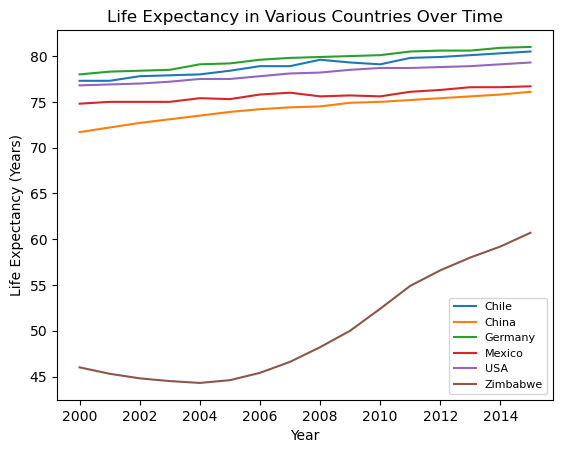

In [56]:
for i in country_names:
    life_expectancy_graph(i)

In [57]:
def country_gdp_graph(country_name):
    for i in range(0,1):
        country_data = all_data[all_data.Country == country_name]
        plt.plot(country_data['Year'], country_data['GDP'], label = country_name)
        plt.title('GDP in Various Countries Over Time - Y AXIS ERROR')
        plt.xlabel('Year')
        plt.ylabel('GDP (Dollars)')
        plt.legend(fontsize="8", loc = 'upper left')
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

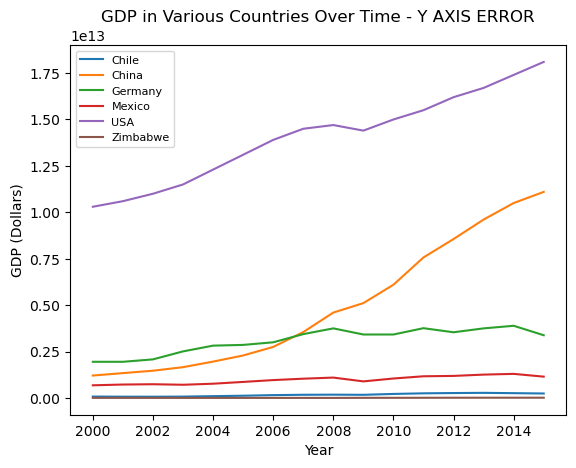

In [58]:
for i in country_names:
    country_gdp_graph(i)

In [59]:
print('From 2004 to 2015, life expectancy has very gradually increased in every country observed except for Zimbabwe, which has has a dramatic increase in life expectancy ever since 2006. GDP has remained fairly stagnant in all countries within this timeframe with the exception of the USA and China, which have both experienced large increases in GDP over the last 15 years. Based off of this evidence, there does not seem to be a large correlation between life expectancy and GDP. ')

From 2004 to 2015, life expectancy has very gradually increased in every country observed except for Zimbabwe, which has has a dramatic increase in life expectancy ever since 2006. GDP has remained fairly stagnant in all countries within this timeframe with the exception of the USA and China, which have both experienced large increases in GDP over the last 15 years. Based off of this evidence, there does not seem to be a large correlation between life expectancy and GDP. 


In [60]:
#Can we predict life expectancy based on GDP for developed, underdevoped, and all countries combined? What about for all countries

In [61]:
developed_countries = all_data[all_data.Developed == 'Developed']

In [62]:
underdeveloped_countries = all_data[all_data.Developed == 'Underdeveloped']

In [63]:
developed_and_underdeveloped_countries = [developed_countries, underdeveloped_countries, all_data]

In [64]:
def developed_scatter(development_status):
    hue_country = development_status['Country']
    x_values = development_status['GDP']
    y_values = development_status['Life Expectancy']
    sns.scatterplot(x = x_values, y = y_values, hue = hue_country)
    model = sm.OLS.from_formula('Q("Life Expectancy") ~ GDP', data = development_status)
    results = model.fit()
    predicted_age = results.params[1] * development_status.GDP + results.params[0]
    plt.plot(development_status.GDP, predicted_age)
    if (development_status.Developed == 'Developed').all():
        plt.title('Life Expectancy vs GDP for Developed Countries')
    elif (development_status.Developed == 'Underdeveloped').all():
        plt.title('Life Expectancy vs GDP for Underdeveloped Countries')
    else:
        plt.title('Life Expectancy vs GDP for All Countries')
    plt.show()
    plt.clf()   
    print(results.params)

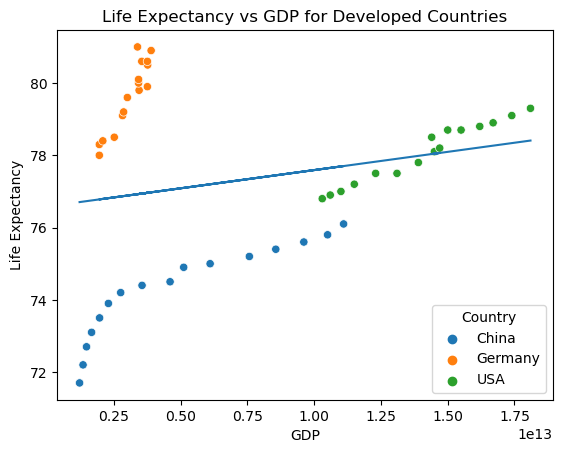

Intercept    7.658327e+01
GDP          1.008280e-13
dtype: float64


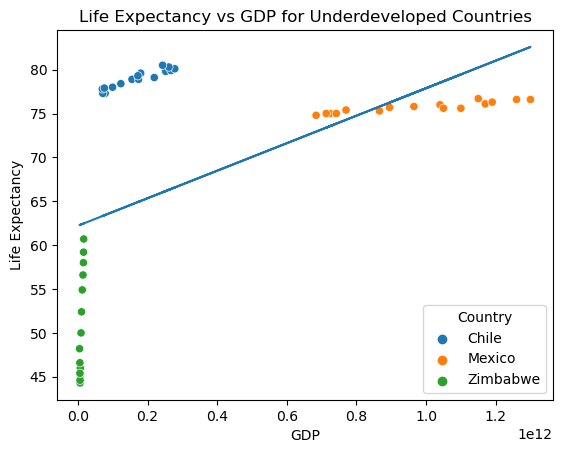

Intercept    6.221784e+01
GDP          1.567130e-11
dtype: float64


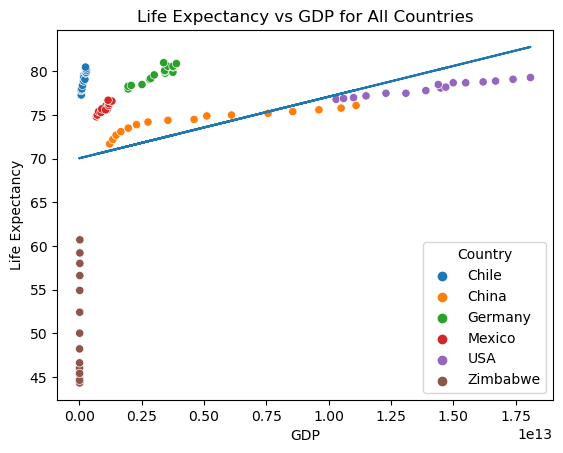

Intercept    7.005491e+01
GDP          7.046190e-13
dtype: float64


<Figure size 640x480 with 0 Axes>

In [65]:
for i in developed_and_underdeveloped_countries:
    developed_scatter(i)

In [66]:
def homoscedasticity_normality_tests(developed_or_not):
    model = sm.OLS.from_formula('Q("Life Expectancy") ~ GDP', data = developed_or_not)
    results = model.fit()
    fitted_values = results.predict(developed_or_not)
    residuals = developed_or_not['Life Expectancy'] - fitted_values
    plt.hist(residuals)
    if (developed_or_not.Developed == 'Developed').all():
        plt.title('Normality Test for Developed Countries')
    elif (developed_or_not.Developed == 'Underdeveloped').all():
        plt.title('Normality Test for Underdeveloped Countries')
    else:
        plt.title('Normality Test for All Countries')
    plt.show()
    plt.clf()
    plt.scatter(fitted_values, residuals)
    if (developed_or_not.Developed == 'Developed').all():
        plt.title('Homoscedasticity Test for Developed Countries')
    elif (developed_or_not.Developed == 'Underdeveloped').all():
        plt.title('Homoscedasticity Test for Underdeveloped Countries')
    else:
        plt.title('Homoscedasticity Test for All Countries')
    plt.show()
    plt.clf()    

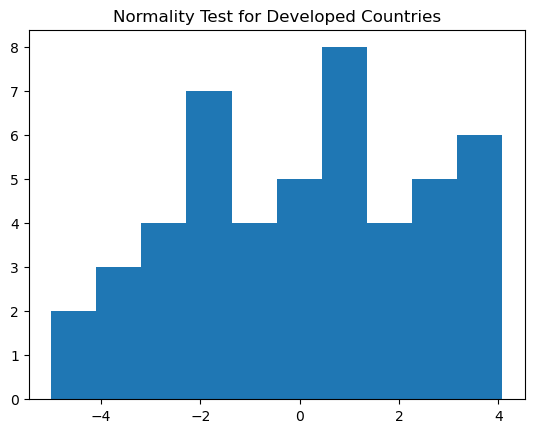

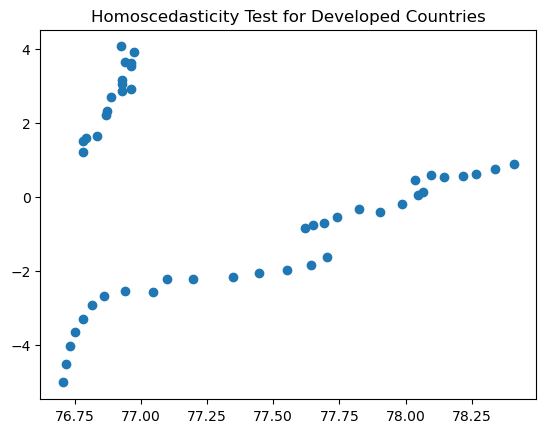

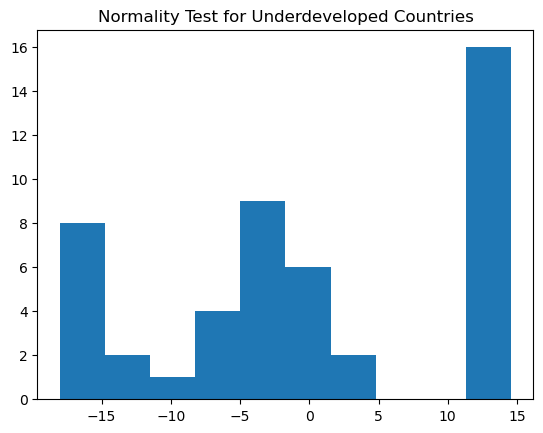

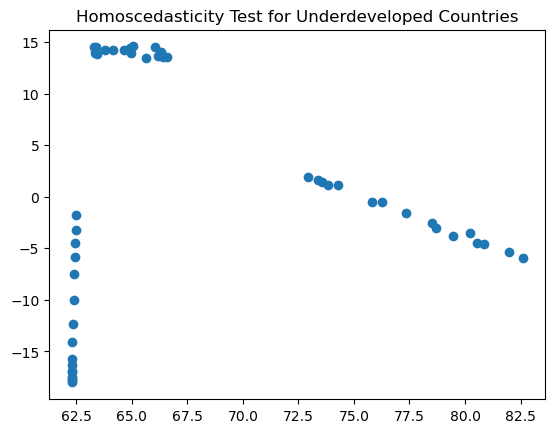

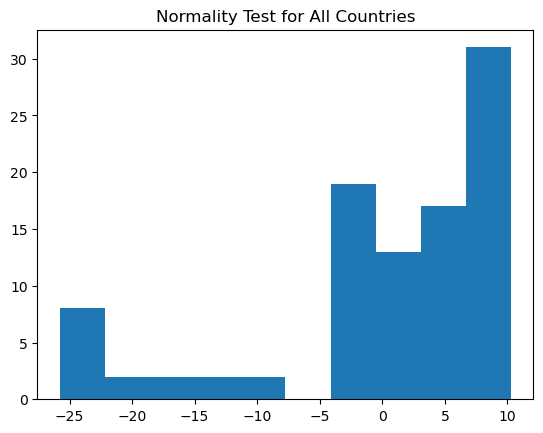

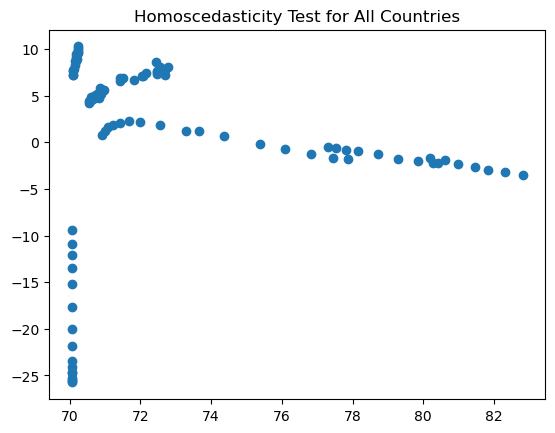

<Figure size 640x480 with 0 Axes>

In [67]:
for i in developed_and_underdeveloped_countries:
    homoscedasticity_normality_tests(i)

In [68]:
print('Since normality and homoscedasticity are not met, linear regression may not be a suitable way to predict life expectancy based on GDP. Nonetheless, a function has been provided above. ')

Since normality and homoscedasticity are not met, linear regression may not be a suitable way to predict life expectancy based on GDP. Nonetheless, a function has been provided above. 


In [69]:
def gdp_age_predictor(gdp):
    model = sm.OLS.from_formula('Q("Life Expectancy") ~ GDP', data = all_data)
    results = model.fit()
    predicted_age = results.params[1] * gdp + results.params[0]
    return predicted_age

In [70]:
test1 = gdp_country_mean.GDP.min()
test2 = gdp_country_mean.GDP.max()

In [71]:
gdp_age_predictor(test1)
gdp_age_predictor(test2)

79.97242185558193